# Gausian Process Regression Example from the scikit-learn website

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import gaussian_process

%matplotlib inline

In [9]:
def f(x):
    return x * np.sin(x)

X = np.atleast_2d([0., 1., 3., 5., 6., 7., 8., 9., 10., 13.]).T

y = f(X).ravel()
x = np.atleast_2d(np.linspace(-5, 15, 1000)).T

In [10]:
gp = gaussian_process.GaussianProcess(theta0=1e-2, thetaL=1e-4, thetaU=1e-1)
gp.fit(X, y)  

y_pred, sigma2_pred = gp.predict(x, eval_MSE=True)
sigma = np.sqrt(sigma2_pred)

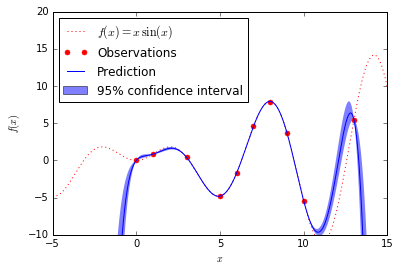

In [11]:
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(
    np.concatenate([x, x[::-1]]),
    np.concatenate([ y_pred - 1.9600 * sigma,
                    (y_pred + 1.9600 * sigma)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

## Noisy case

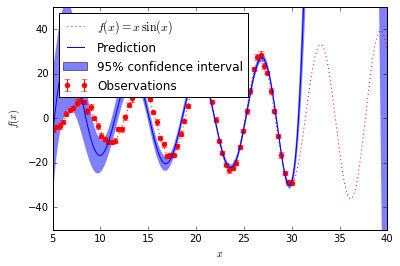

In [47]:
X = np.linspace(5, 30, 70)
X = np.atleast_2d(X).T

# Observations and noise
y = f(X).ravel()
variances = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, variances)
y += noise

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(5, 40, 1000)).T
nugget = (variances / y) ** 4
# nugget[nugget > 2.0] = 2.0

# print(nugget)
# nugget = np.ones_like(y) * 1e-13

# Instantiate a Gaussian Process model
gp = gaussian_process.GaussianProcess(
        corr='squared_exponential', theta0=1e-1,
        thetaL=1e-3, thetaU=1,
        # Failing to set the nugget leads to very noisy (jagged) predictions
        # when the inputs are noisy.
        nugget=nugget,
        random_start=100)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, MSE = gp.predict(x, eval_MSE=True)
sigma = np.sqrt(MSE)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.errorbar(X.ravel(), y, variances, fmt='r.', markersize=10, label=u'Observations')
# plt.plot(X.ravel(), y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                       (y_pred + 1.9600 * sigma)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-50, 50)
plt.legend(loc='upper left')

0.01
0.1


In [5]:
from pymatbridge import Matlab
mlab = Matlab()
#mlab = Matlab(executable='/Applications/MATLAB_R2011a.app/bin/matlab')
mlab.start()

Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-54bafa00-c87e-4bec-94ae-5f04083e098b
Send 'exit' command to kill the server
.......MATLAB started and connected!


In [7]:
mlab.run_code("a = exp(10);")

{'content': {'datadir': '/private/tmp/MatlabData/',
  'figures': [],
  'stdout': ''},
 'result': [],
 'success': True}

In [8]:
mlab.get_variable('a')

22026.465794806718

In [11]:
import math

# We may need an epsilon comparison, but ain't nobody got time fo' dat.
assert mlab.get_variable('a') == math.exp(10)